<a href="https://colab.research.google.com/github/mralamdari/Machine_Learning_Projects/blob/main/handWriting_Digits_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.base import clone, BaseEstimator
import sklearn.linear_model as sklinear
import sklearn.model_selection as model
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
# mnist.keys()
# dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
x, y = mnist.data, mnist.target
# y.reshape(-1, 1)

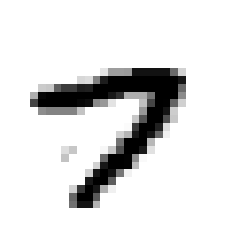

7


In [ ]:
some_digit = x[185]
plt.imshow(some_digit.reshape(28,28), cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()
print(y[185])

In [ ]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
# print(y_train_5.shape, y_train_5.shape)
# np.unique(y_train_5)
# any(y_train_5)
# print(y_train)

True

In [ ]:
sgd_clf = sklinear.SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print(y[0])
sgd_clf.predict([x[0]])

5


array([ True])

In [ ]:
skfolds = model.StratifiedKFold(n_splits=3, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train_5[train_index], y_train_5[test_index]
    clone_clf.fit(x_train_fold, y_train_fold)
    y_pred = clone_clf.predict(x_test_fold)
    result = np.sum(y_pred == y_test_fold) / len(y_pred)
    print(result)

0.95035
0.96035
0.9604


In [ ]:
# array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])               43
# array([0.96358333, 0.96108333, 0.95716667, 0.95725   , 0.961     ])               20
# array([0.9515    , 0.96408333, 0.96858333, 0.96241667, 0.93408333])               85
sgd = sklinear.SGDClassifier(random_state=85)
# sgd_clf = sklinear.SGDClassifier(random_state=42)
sgd.fit(x_train, y_train_5)
model.cross_val_score(sgd, x_train, y_train_5, scoring='accuracy')

array([0.9515    , 0.96408333, 0.96858333, 0.96241667, 0.93408333])

In [ ]:
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

never_5_cld = Never5Classifier()
model.cross_val_score(never_5_cld, x_train, y_train_5, scoring='accuracy')

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

In [ ]:
y_train_pred = model.cross_val_predict(sgd_clf, x_train, y_train_5)
metrics.confusion_matrix(y_train_5, y_train_pred)

array([[53115,  1464],
       [  916,  4505]])

In [ ]:
metrics.confusion_matrix(y_train_pred, y_train_pred)

array([[54031,     0],
       [    0,  5969]])

In [ ]:
metrics.precision_score(y_train_5, y_train_pred)

0.7547327860613168

In [ ]:
metrics.recall_score(y_train_5, y_train_pred)

0.8310274857037447

In [ ]:
metrics.f1_score(y_train_5, y_train_pred)

0.791044776119403

In [ ]:
y_score = sgd_clf.decision_function([x[0]])
y_score > 8000

array([False])

In [ ]:
y_scores = model.cross_val_predict(sgd_clf, x_train, y_train_5, method='decision_function')

In [ ]:
precision, recall, thereshold = metrics.precision_recall_curve(y_train_5, y_scores)

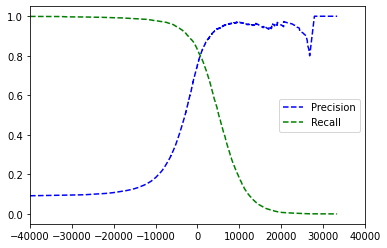

In [ ]:
def plot_precision_recall_vs_thereshold(precision, recall, thereshold):
    fig, ax = plt.subplots()
    plt.plot(thereshold, precision[:-1], 'b--', label='Precision')
    plt.plot(thereshold, recall[:-1], 'g--', label='Recall')
    ax.set_xlim([-40000, 40000])
    plt.legend()

plot_precision_recall_vs_thereshold(precision, recall, thereshold)
plt.show()    

In [ ]:
thereshold_90_percent = thereshold[np.argmax(precision >= 0.92)]
thereshold_90_percent

3801.881885089166

In [ ]:
y_train_predict90 = (y_scores >= thereshold_90_percent)

In [ ]:
metrics.precision_score(y_train_5, y_train_predict90)

0.920113314447592

In [ ]:
metrics.recall_score(y_train_5, y_train_predict90)

0.5991514480723114

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  # fig, ax = plt.subplots()
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  # ax.xlabel('')
  plt.legend()

No handles with labels found to put in legend.


[0.         0.         0.         ... 0.99857088 0.99857088 1.        ] [0.00000000e+00 1.84467810e-04 7.37871241e-04 ... 9.99815532e-01
 1.00000000e+00 1.00000000e+00] [  33371.36083388   33370.36083388   27939.65338    ...  -71564.61915861
  -71657.12621734 -116288.54262534]


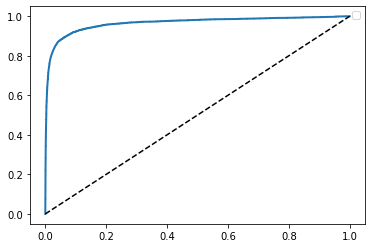

In [ ]:
print(fpr, tpr, threshold)
plot_roc_curve(fpr, tpr)

plt.show()

In [ ]:
metrics.roc_auc_score(y_train_5, y_scores)

0.9648211175804801

In [ ]:
# randomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = model.cross_val_predict(forest_clf, x_train, y_train_5, method='predict_proba')
y_probas_forest

array([[0.14, 0.86],
       [0.99, 0.01],
       [0.98, 0.02],
       ...,
       [0.01, 0.99],
       [0.96, 0.04],
       [0.96, 0.04]])

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = metrics.roc_curve(y_train_5, y_scores_forest)

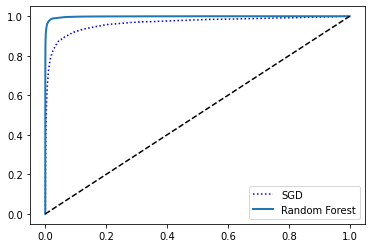

In [ ]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
metrics.roc_auc_score(y_train_5, y_scores_forest)

0.998402186461512

In [ ]:
# Multiclass Classification
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([x[12]])

array(['3'], dtype='<U1')

In [ ]:
someds=sgd_clf.decision_function([x_train[0]])
print(someds)

[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]


In [ ]:
np.argmax(someds)

3

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(sklinear.SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([x[0]])

array(['5'], dtype=object)

In [ ]:
len(ovo_clf.estimators_)

45

In [ ]:
forest_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
forest_clf.predict([x[0]])

array(['5'], dtype=object)

In [ ]:
forest_clf.predict_proba([x[0]])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [ ]:
model.cross_val_score(sgd_clf, x_train, y_train, scoring='accuracy')

array([0.88083333, 0.88325   , 0.88116667, 0.86625   , 0.8875    ])

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
model.cross_val_score(sgd_clf, x_train_scaled, y_train, scoring='accuracy')

array([0.89733333, 0.88725   , 0.89583333, 0.89233333, 0.90516667])

In [ ]:
y_train_pred = model.cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [ ]:
# plt.matshow(conf_mx, cmap=plt.cm.gray)
# plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (np.float64(y_train) >= 7)
y_train_odd = (np.float64(y_train) % 2 == 1)
y_mltilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)
knn_clf.predict([x[0]])